# Random Forest (Weather Forecast Prediction)

## Explanation

### Objective

created a machine learning model that can predict the weather forecast, using the Random Forest algorithm.

### Column Descriptions

- **Temperature** = Current air temperature.
- **Humidity** = Air humidity level in percent.
- **Wind_Speed** ​​= Current wind speed.
- **Cloud_Cover** = Percentage of cloud cover in the sky.
- **Pressure** = Air pressure (atmospheric).
- **Rain (Target)** = Whether it will rain or not (rain/no rain).

## A. Data Preparation

### A.1 Import Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [83]:
try:
    df = pd.read_csv('weather_forecast.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [84]:
df.shape

(2500, 6)

### A.4 Viewing Data Informations

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


### A.5 Viewing Data Statistics

In [86]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Temperature,2500.00,22.58,7.33,10.00,16.36,22.54,28.98,35.00
Humidity,2500.00,64.35,19.95,30.01,47.34,63.92,81.56,100.00
Wind_Speed,2500.00,9.91,5.78,0.01,4.76,9.91,14.95,20.00
Cloud_Cover,2500.00,49.66,29.12,0.02,23.90,49.49,75.32,100.00
Pressure,2500.00,1014.31,20.20,980.01,996.94,1013.43,1031.74,1049.99


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [87]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [88]:
df.tail()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain
2499,26.554356,97.101517,18.563084,81.357508,1001.729176,no rain


### A.7 Viewing Duplicated Data

In [89]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [90]:
df.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

### A.9 Viewing Outliers Data

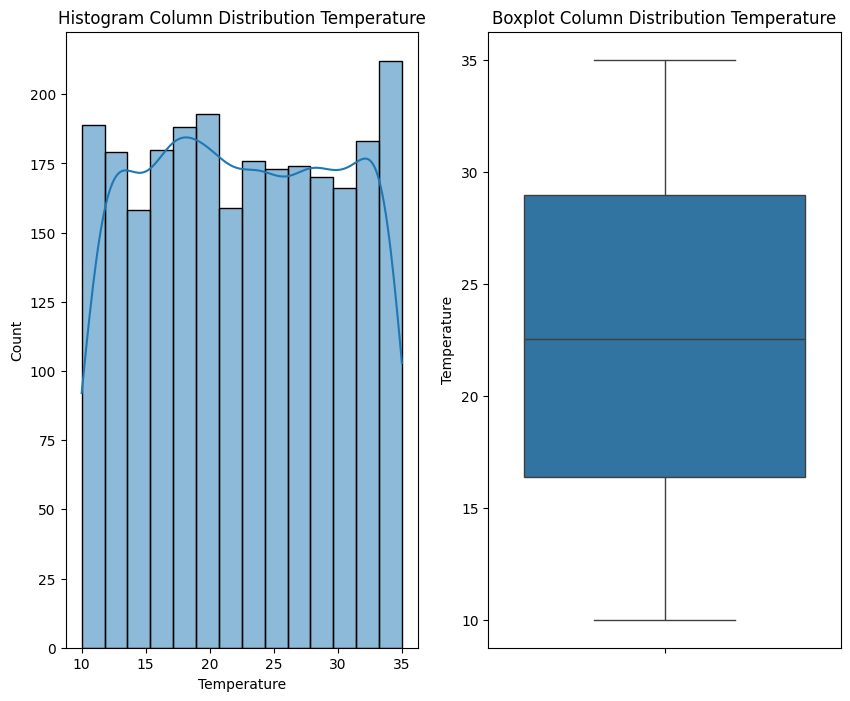

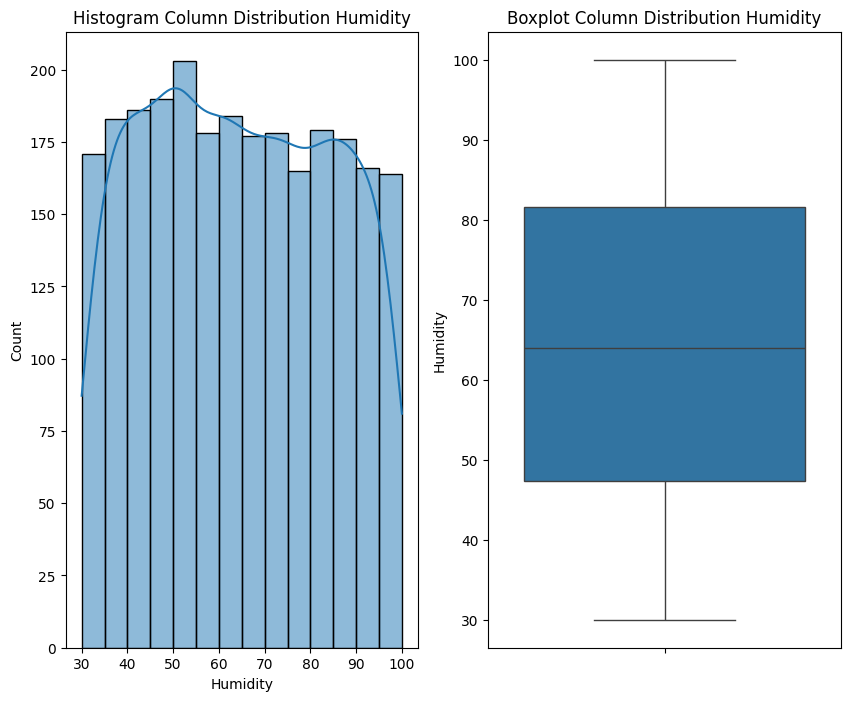

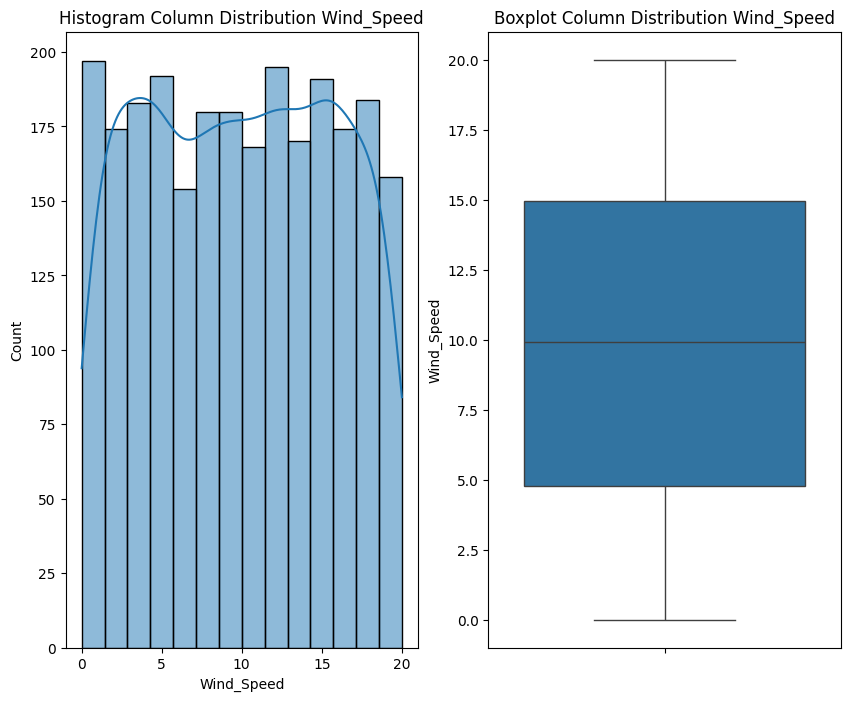

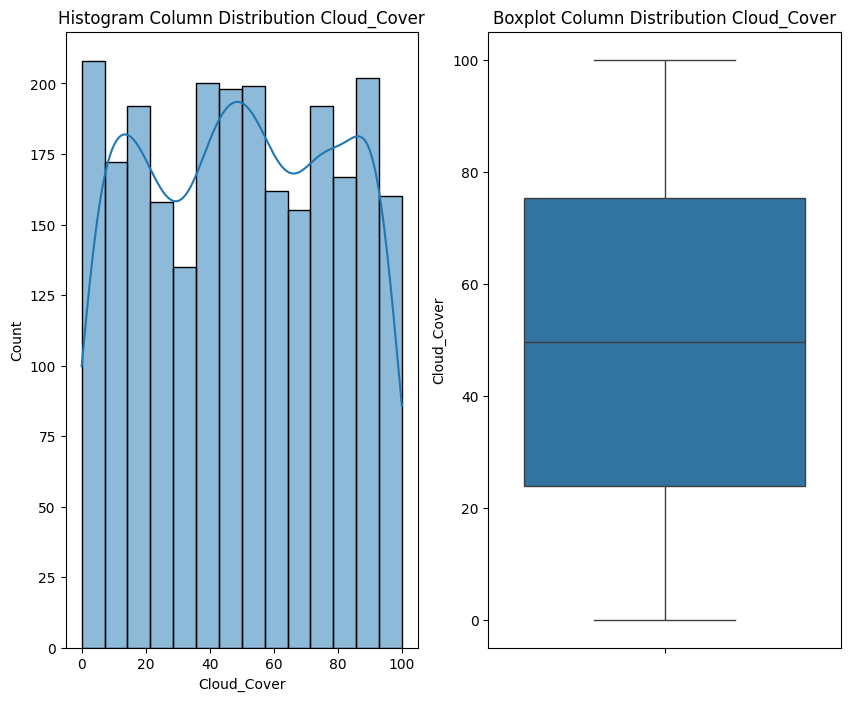

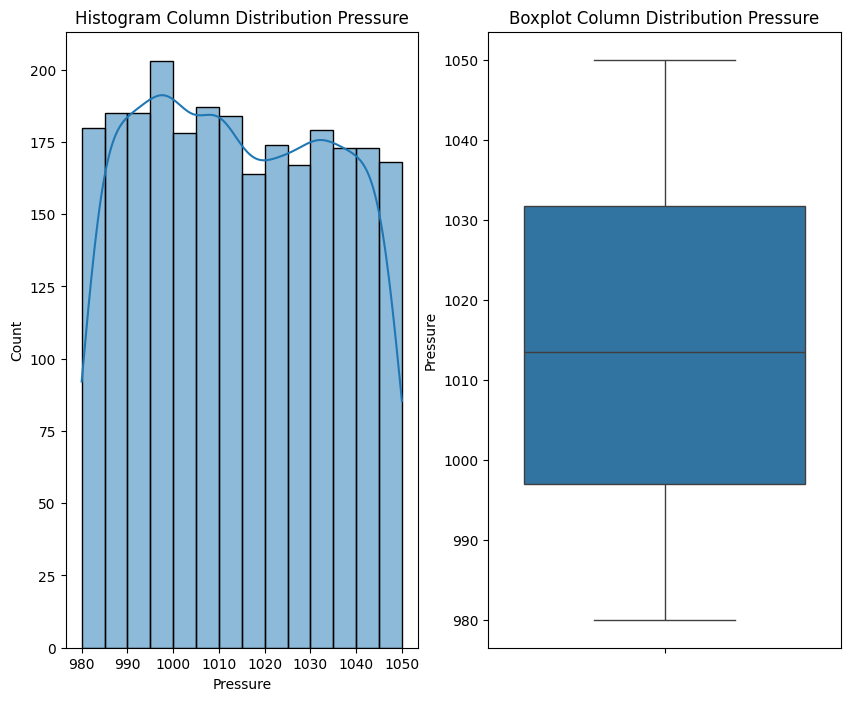

In [91]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Mapping Label

In [92]:
rain_mapping = {"no rain" : 0, "rain" : 1}
df['Rain_Sign'] = df['Rain'].map(rain_mapping)

In [93]:
df['Rain_Sign'].unique()

array([1, 0])

### B.2 Feature Engineering

#### Creating New Column

Cloud Humidity

In [94]:
df['Cloud_Humidity'] = df['Cloud_Cover'] * df['Humidity']

In [95]:
df['Cloud_Humidity'].head()

0    4524.580108
1     231.986084
2    1234.112205
3    5001.624535
4    4617.884250
Name: Cloud_Humidity, dtype: float64

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

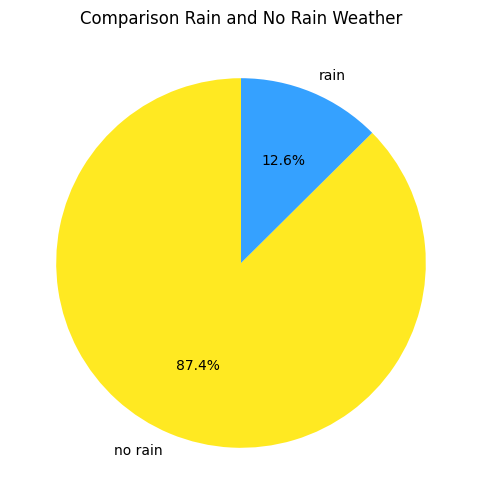

In [96]:
plt.figure(figsize=(6, 6))
df['Rain'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ffe600dd", "#0088ffca"])
plt.title("Comparison Rain and No Rain Weather")
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

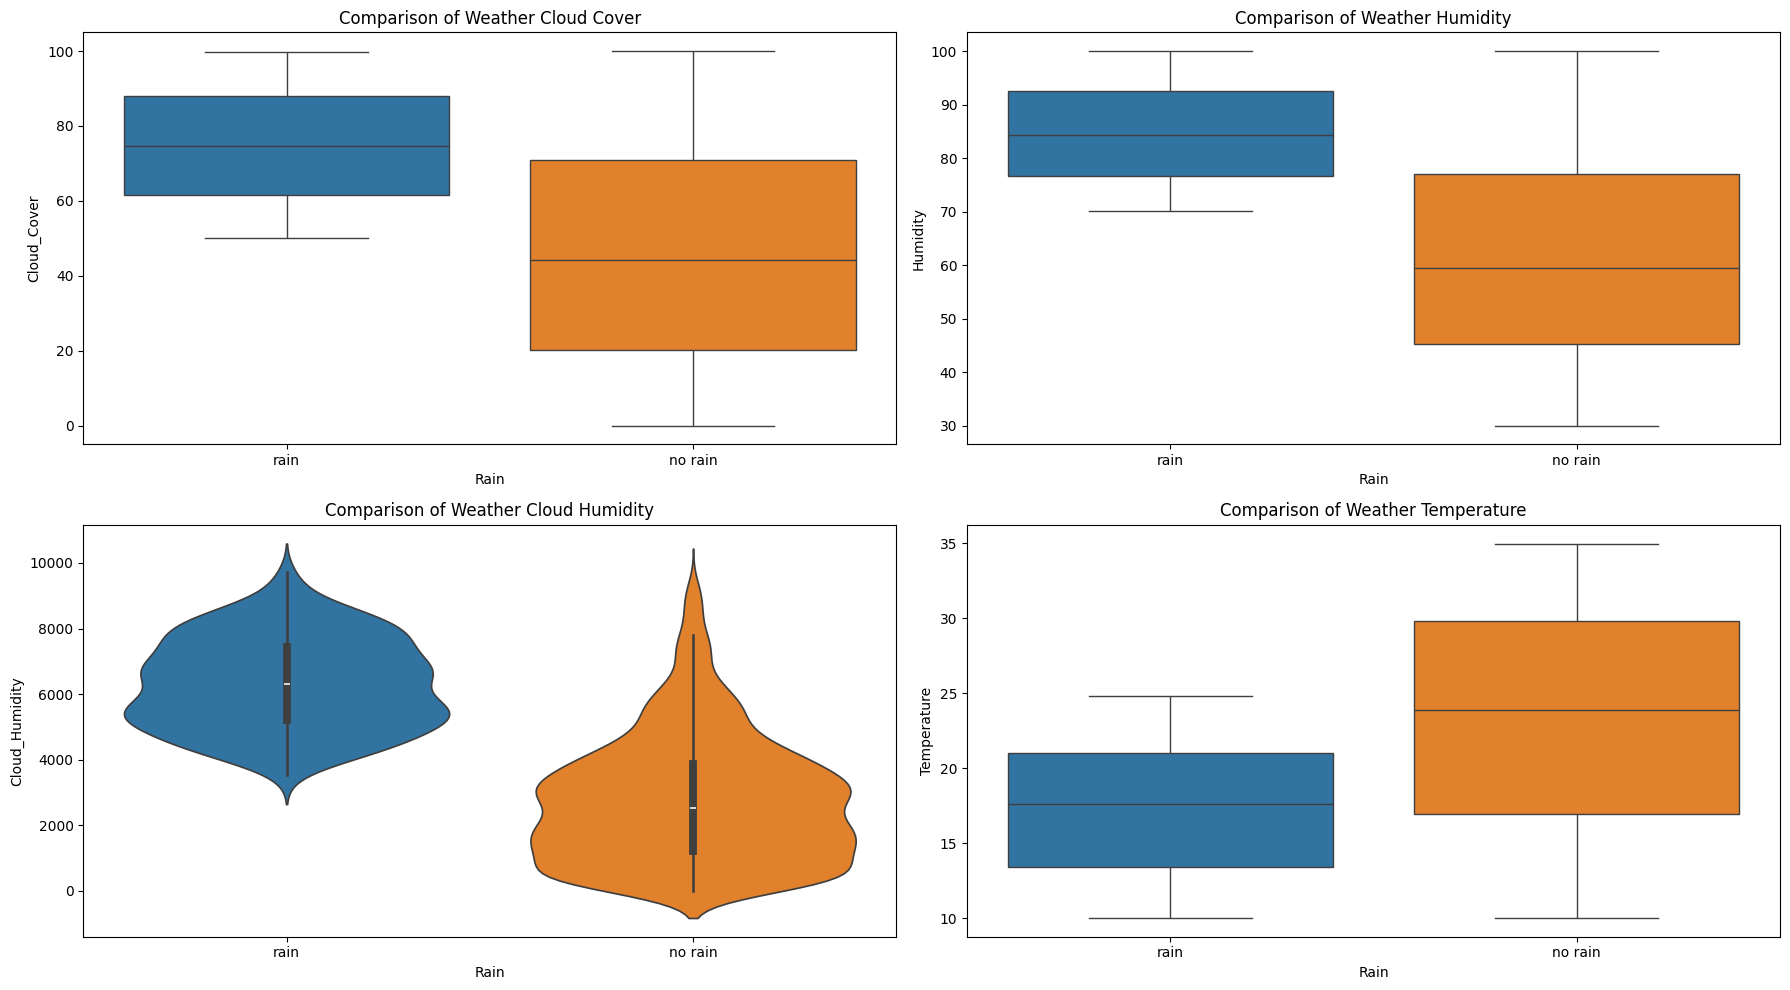

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(x='Rain', y='Cloud_Cover', data=df, hue='Rain', ax=axes[0, 0])
axes[0, 0].set_title("Comparison of Weather Cloud Cover")

sns.boxplot(x='Rain', y='Humidity', data=df, hue='Rain', ax=axes[0, 1])
axes[0, 1].set_title("Comparison of Weather Humidity")

sns.violinplot(x='Rain', y='Cloud_Humidity', data=df, hue='Rain', ax=axes[1, 0])
axes[1, 0].set_title("Comparison of Weather Cloud Humidity")

sns.boxplot(x='Rain', y='Temperature', data=df, hue='Rain', ax=axes[1, 1])
axes[1, 1].set_title("Comparison of Weather Temperature")

plt.tight_layout()
plt.show()

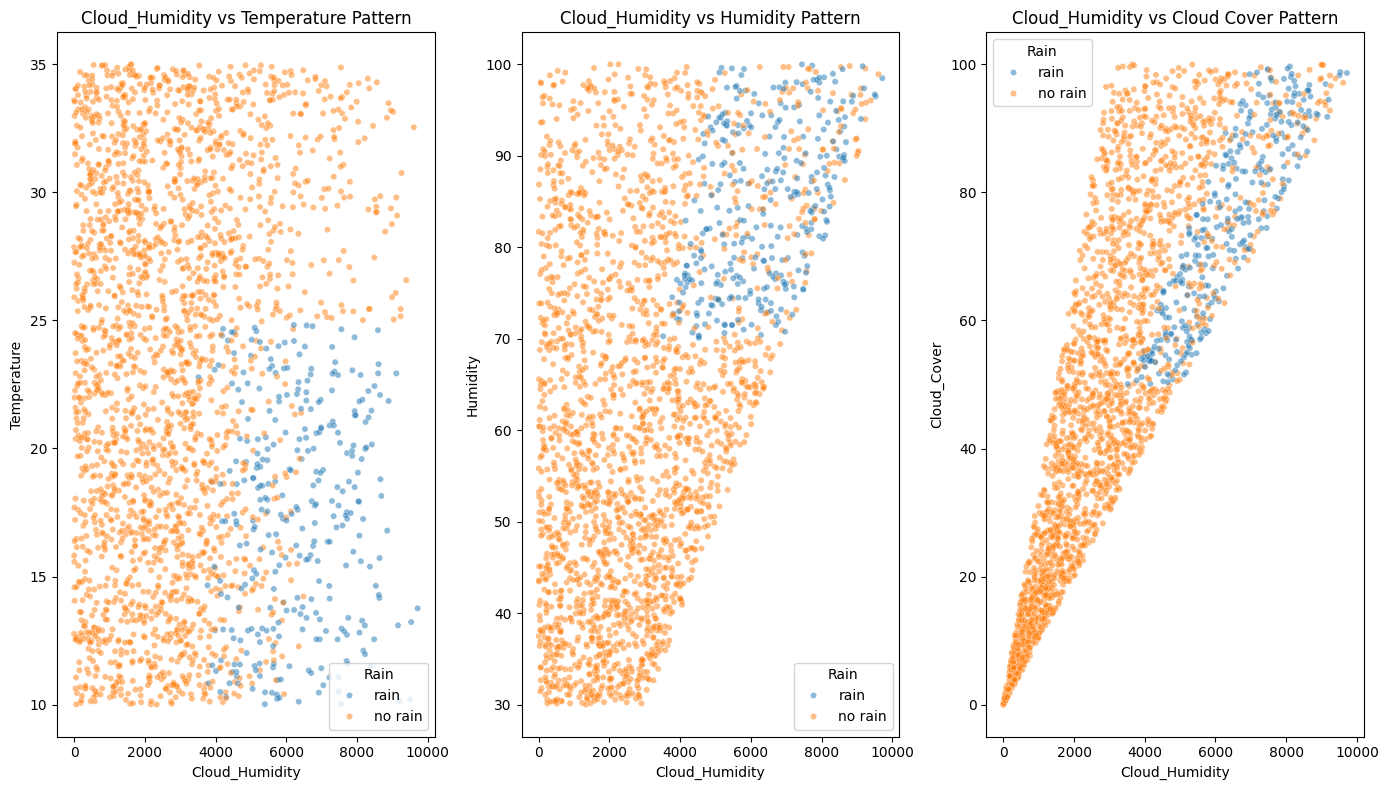

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(14, 8))

sns.scatterplot(x='Cloud_Humidity', y='Temperature', data=df, alpha=0.5, s=20, hue='Rain', ax=axes[0])
axes[0].set_title("Cloud_Humidity vs Temperature Pattern")

sns.scatterplot(x='Cloud_Humidity', y='Humidity', data=df, alpha=0.5, s=20, hue='Rain', ax=axes[1])
axes[1].set_title("Cloud_Humidity vs Humidity Pattern")

sns.scatterplot(x='Cloud_Humidity', y='Cloud_Cover', data=df, alpha=0.5, s=20, hue='Rain', ax=axes[2])
axes[2].set_title("Cloud_Humidity vs Cloud Cover Pattern")

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

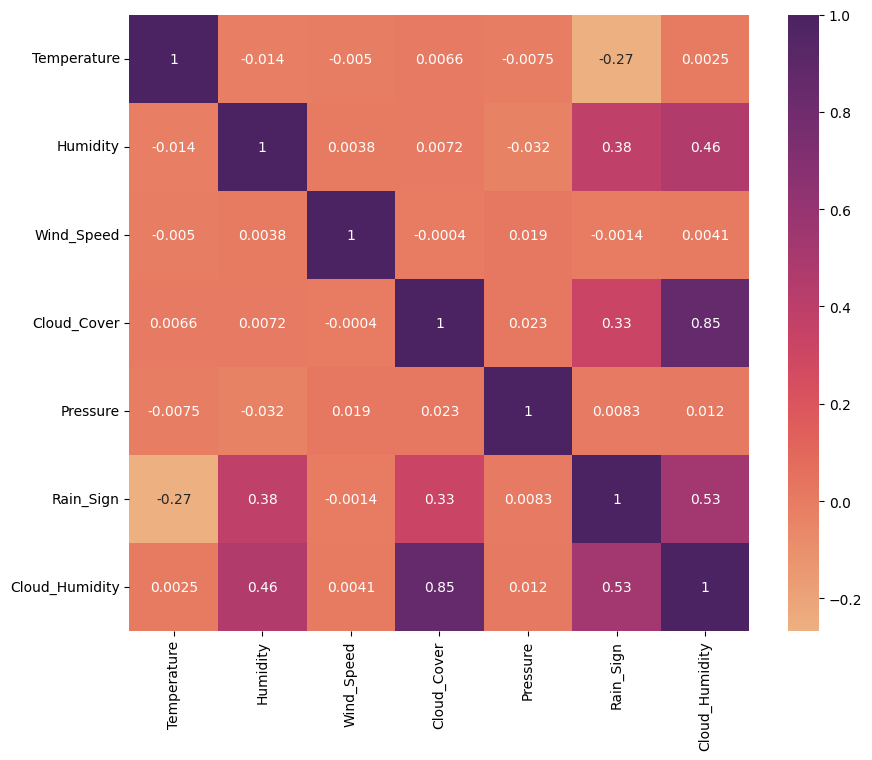

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

## D. Modelling

## E. Evaluation